In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import norm
from scipy import stats


set_config(display='diagram')

In [2]:
df = pd.read_excel("3g_new.xlsx")
df.head()

df1 = pd.read_excel("2g_new.xlsx")
df1.head()

,Location,Infections,deaths,mask,Total Floor Space,Residential Settlement (% of area of floor space),Industrial and Commercial Settlement (%),"Sports, leisure, recreation (%)",Other (%),Traffic/Transport (%),...,Water Bodies (%),Total Population,Female,Male,(Female) % of Population,(Male) % of Population,(Female) % of Foreigner's Population,(Male) % of Foreigner's Population,% of Total Population,Inhabitants \nper km2
0,Ahrweiler,19256,38,No,78703,3.206993,0.998691,1.644156,1.288388,6.741801,...,1.617473,130479,66135,64344,50.686317,49.313683,46.391909,53.608091,10.079017,165.788477
1,Altenkirchen,23304,38,No,64238,6.149008,1.628320,0.899779,1.460195,5.683552,...,0.891995,129087,65144,63943,50.465190,49.534810,46.036202,53.963798,8.003130,200.949965
2,Alzey-Worms,26284,64,No,58807,3.451970,1.226045,1.816110,1.947047,7.143707,...,1.591647,130715,65751,64964,50.301037,49.698963,45.440613,54.559387,9.983552,222.278045
3,Bad Dürkheim,23045,43,No,59464,3.713171,1.072918,2.097067,1.439526,5.034979,...,0.662586,133004,67901,65103,51.051848,48.948152,47.748691,52.251309,8.616282,223.672048
4,Bad Kreuznach,36662,83,No,86389,3.283983,1.325400,1.862506,1.842827,5.801665,...,0.971188,158746,81197,77549,51.149005,48.850995,48.613890,51.386110,11.020750,183.756662


In [3]:
df1

,Location,Infections,deaths,mask,Total Floor Space,Residential Settlement (% of area of floor space),Industrial and Commercial Settlement (%),"Sports, leisure, recreation (%)",Other (%),Traffic/Transport (%),...,Water Bodies (%),Total Population,Female,Male,(Female) % of Population,(Male) % of Population,(Female) % of Foreigner's Population,(Male) % of Foreigner's Population,% of Total Population,Inhabitants \nper km2
0,Ahrweiler,19256,38,No,78703,3.206993,0.998691,1.644156,1.288388,6.741801,...,1.617473,130479,66135,64344,50.686317,49.313683,46.391909,53.608091,10.079017,165.788477
1,Altenkirchen,23304,38,No,64238,6.149008,1.628320,0.899779,1.460195,5.683552,...,0.891995,129087,65144,63943,50.465190,49.534810,46.036202,53.963798,8.003130,200.949965
2,Alzey-Worms,26284,64,No,58807,3.451970,1.226045,1.816110,1.947047,7.143707,...,1.591647,130715,65751,64964,50.301037,49.698963,45.440613,54.559387,9.983552,222.278045
3,Bad Dürkheim,23045,43,No,59464,3.713171,1.072918,2.097067,1.439526,5.034979,...,0.662586,133004,67901,65103,51.051848,48.948152,47.748691,52.251309,8.616282,223.672048
4,Bad Kreuznach,36662,83,No,86389,3.283983,1.325400,1.862506,1.842827,5.801665,...,0.971188,158746,81197,77549,51.149005,48.850995,48.613890,51.386110,11.020750,183.756662
5,Bernkastel-Wittlich,18554,46,No,116792,2.059216,1.198712,1.113946,1.361395,6.318070,...,1.443592,112685,56263,56422,49.929449,50.070551,45.341716,54.658284,10.868350,96.483267
6,Birkenfeld,15833,23,No,77683,2.744487,0.801977,1.364520,1.975979,4.644517,...,0.538084,80830,40743,40087,50.405790,49.594210,47.975232,52.024768,9.990103,104.051310
7,Bitburg-Prüm,12529,29,No,162695,1.752973,0.752328,0.882019,1.504041,5.724823,...,0.607886,100055,49571,50484,49.543751,50.456249,47.275874,52.724126,14.437060,61.498695
8,Cochem-Zell,11004,34,No,69243,1.916439,0.813079,1.246335,1.413861,5.905290,...,1.750357,61578,30720,30858,49.887947,50.112053,48.636457,51.363543,7.920036,88.930105
9,Donnersbergkreis,16907,31,No,64541,2.554965,0.780899,1.205435,1.815900,5.162610,...,0.639903,75539,38122,37417,50.466646,49.533354,46.857052,53.142948,8.297701,117.040826


In [4]:
df['Location'] =  df['Location'].astype(str) + ' 3g'

df1['Location'] =  df1['Location'].astype(str) + ' 2g' 



In [5]:
combine = df.append(df1, ignore_index=True)
combine = combine.sort_values(by = ["Location"],ascending=True)

combine[' mask'] = combine[' mask'].map({'Yes': 1, 'No': 2})


C:\Users\nishi\AppData\Local\Temp\ipykernel_9028\3080476608.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = df.append(df1, ignore_index=True)


In [6]:
combine.head()



,Location,Infections,deaths,mask,Total Floor Space,Residential Settlement (% of area of floor space),Industrial and Commercial Settlement (%),"Sports, leisure, recreation (%)",Other (%),Traffic/Transport (%),...,Water Bodies (%),Total Population,Female,Male,(Female) % of Population,(Male) % of Population,(Female) % of Foreigner's Population,(Male) % of Foreigner's Population,% of Total Population,Inhabitants \nper km2
36,Ahrweiler 2g,19256,38,2,78703,3.206993,0.998691,1.644156,1.288388,6.741801,...,1.617473,130479,66135,64344,50.686317,49.313683,46.391909,53.608091,10.079017,165.788477
0,Ahrweiler 3g,21526,38,1,78703,3.206993,0.998691,1.644156,1.288388,6.741801,...,1.617473,130479,66135,64344,50.686317,49.313683,46.391909,53.608091,10.079017,165.788477
37,Altenkirchen 2g,23304,38,2,64238,6.149008,1.628320,0.899779,1.460195,5.683552,...,0.891995,129087,65144,63943,50.465190,49.534810,46.036202,53.963798,8.003130,200.949965
1,Altenkirchen 3g,21189,28,1,64238,6.149008,1.628320,0.899779,1.460195,5.683552,...,0.891995,129087,65144,63943,50.465190,49.534810,46.036202,53.963798,8.003130,200.949965
38,Alzey-Worms 2g,26284,64,2,58807,3.451970,1.226045,1.816110,1.947047,7.143707,...,1.591647,130715,65751,64964,50.301037,49.698963,45.440613,54.559387,9.983552,222.278045


In [7]:
combine.info()

#combines = combine

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 36 to 23
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Location                                           72 non-null     object 
 1    Infections                                        72 non-null     int64  
 2    deaths                                            72 non-null     int64  
 3    mask                                              72 non-null     int64  
 4   Total Floor Space                                  72 non-null     int64  
 5   Residential Settlement (% of area of floor space)  72 non-null     float64
 6   Industrial and Commercial Settlement (%)           72 non-null     float64
 7   Sports, leisure, recreation  (%)                   72 non-null     float64
 8   Other (%)                                          72 non-null     float64
 9   Traffic/Tra

In [8]:
combine = combine.drop(["Female", "Male", "Water Bodies  (%)","Others (%)", "Other (%)", "Sports, leisure, recreation  (%)","Traffic/Transport (%)",
                        "Forest (%)"   ],axis=1)

combines = combine  

In [9]:
print(combines.skew())

print(combines.kurtosis())


 Infections                                          0.722639
 deaths                                              0.825059
 mask                                                0.000000
Total Floor Space                                    0.374070
Residential Settlement (% of area of floor space)    1.034517
Industrial and Commercial Settlement (%)             2.431295
Agriculture  (%)                                     0.384321
Total Population                                     0.444169
(Female) % of Population                             0.633329
(Male) % of Population                              -0.633329
(Female) % of Foreigner's Population                -0.276323
(Male) % of Foreigner's Population                   0.276323
% of Total Population                                1.596458
Inhabitants \nper km2                                2.145292
dtype: float64
 Infections                                          0.055111
 deaths                                              0.

C:\Users\nishi\AppData\Local\Temp\ipykernel_9028\2164345625.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(combines.skew())
C:\Users\nishi\AppData\Local\Temp\ipykernel_9028\2164345625.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(combines.kurtosis())


E:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


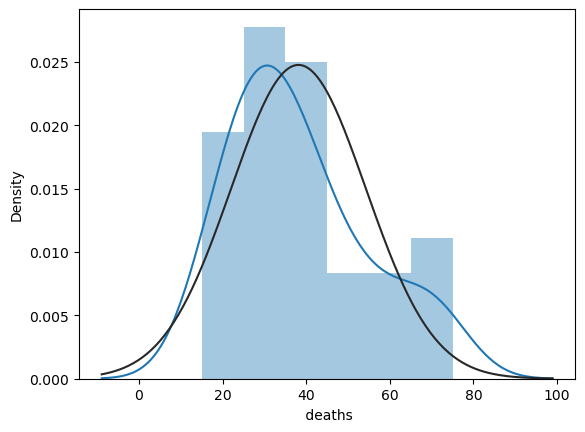

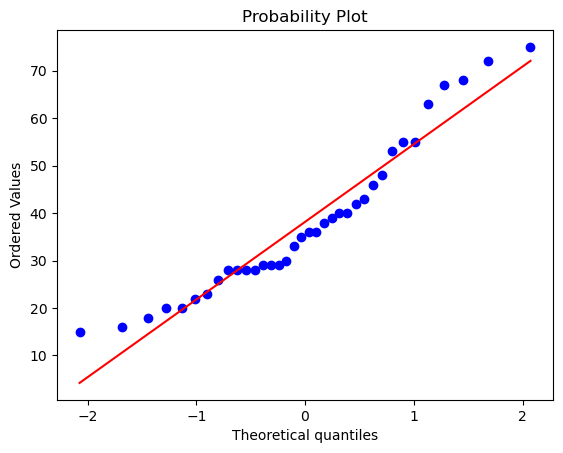

In [10]:
#histogram and normal probability plot
sns.distplot(df[' deaths'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[' deaths'], plot=plt)

In [11]:
combines[' deaths'] = np.log(df[' deaths'])


E:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


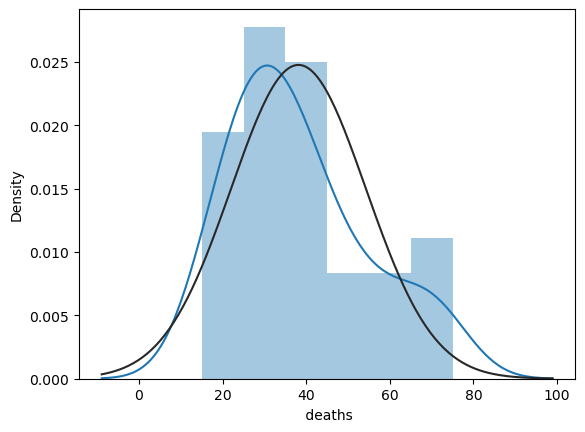

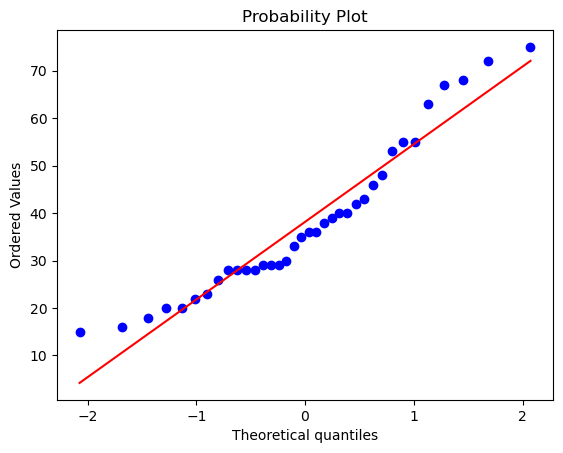

In [12]:
#histogram and normal probability plot
sns.distplot(df[' deaths'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[' deaths'], plot=plt)

In [13]:

combines = combines.drop(["Location"],axis=1)

combines = np.log(combines)

print(combines.skew())

print(combines.kurtosis())


 Infections                                         -0.353382
 deaths                                             -0.268823
 mask                                                0.000000
Total Floor Space                                   -0.657937
Residential Settlement (% of area of floor space)    0.141416
Industrial and Commercial Settlement (%)             0.583377
Agriculture  (%)                                    -1.382037
Total Population                                    -0.427397
(Female) % of Population                             0.580710
(Male) % of Population                              -0.688716
(Female) % of Foreigner's Population                -0.311362
(Male) % of Foreigner's Population                   0.245614
% of Total Population                                0.374367
Inhabitants \nper km2                                0.468802
dtype: float64
 Infections                                         -0.396644
 deaths                                             -0.

In [14]:
combine = combine.drop(["Location"],axis=1)

combine = np.log(combine)



In [15]:
print(combine)

     Infections    deaths      mask  Total Floor Space  \
36     9.865578       NaN  0.693147          11.273437   
0      9.977017  1.291320  0.000000          11.273437   
37    10.056380       NaN  0.693147          11.070350   
1      9.961237  1.203634  0.000000          11.070350   
38    10.176716       NaN  0.693147          10.982016   
..          ...       ...       ...                ...   
21    10.182141  1.276345  0.000000          11.610288   
58     9.607706       NaN  0.693147          11.420415   
22     9.394826  1.019781  0.000000          11.420415   
59    10.625514       NaN  0.693147          11.501905   
23    10.522611  1.453174  0.000000          11.501905   

    Residential Settlement (% of area of floor space)  \
36                                           1.165334   
0                                            1.165334   
37                                           1.816291   
1                                            1.816291   
38                

In [16]:
from scipy.stats import chi2_contingency
factors_paired = [(i,j) for i in combine.columns.values for j in combine.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)
n_features = len(combine.columns)
chi2 = np.array(chi2).reshape((n_features, n_features)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=combine.columns.values, columns=combine.columns.values) # then a df for convenience
# p values is what will help us to decide dependency or independency
p_values = np.array(p_values).reshape((n_features, n_features))
p_values = pd.DataFrame(p_values, index=combine.columns.values, columns=combine.columns.values)

In [17]:
print(p_values)

                                                    Infections    deaths  \
 Infections                                           0.000000  0.267849   
 deaths                                               0.267849  0.000000   
 mask                                                 1.000000  1.000000   
Total Floor Space                                     0.237638  0.267849   
Residential Settlement (% of area of floor space)     0.237638  0.267849   
Industrial and Commercial Settlement (%)              0.237638  0.267849   
Agriculture  (%)                                      0.237638  0.267849   
Total Population                                      0.237638  0.267849   
(Female) % of Population                              0.237638  0.267849   
(Male) % of Population                                0.237638  0.267849   
(Female) % of Foreigner's Population                  0.237638  0.267849   
(Male) % of Foreigner's Population                    0.237638  0.267849   
% of Total P

In [18]:
1 - p_values

,Infections,deaths,mask,Total Floor Space,Residential Settlement (% of area of floor space),Industrial and Commercial Settlement (%),Agriculture (%),Total Population,(Female) % of Population,(Male) % of Population,(Female) % of Foreigner's Population,(Male) % of Foreigner's Population,% of Total Population,Inhabitants \nper km2
Infections,1.000000,0.732151,0.0,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
deaths,0.732151,1.000000,0.0,0.732151,0.732151,0.732151,0.732151,0.732151,0.732151,0.732151,0.732151,0.732151,0.732151,0.732151
mask,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Total Floor Space,0.762362,0.732151,0.0,1.000000,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
Residential Settlement (% of area of floor space),0.762362,0.732151,0.0,0.762362,1.000000,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
Industrial and Commercial Settlement (%),0.762362,0.732151,0.0,0.762362,0.762362,1.000000,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
Agriculture (%),0.762362,0.732151,0.0,0.762362,0.762362,0.762362,1.000000,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
Total Population,0.762362,0.732151,0.0,0.762362,0.762362,0.762362,0.762362,1.000000,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
(Female) % of Population,0.762362,0.732151,0.0,0.762362,0.762362,0.762362,0.762362,0.762362,1.000000,0.762362,0.762362,0.762362,0.762362,0.762362
(Male) % of Population,0.762362,0.732151,0.0,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,1.000000,0.762362,0.762362,0.762362,0.762362


In [19]:
combines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 36 to 23
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0    Infections                                        72 non-null     float64
 1    deaths                                            36 non-null     float64
 2    mask                                              72 non-null     float64
 3   Total Floor Space                                  72 non-null     float64
 4   Residential Settlement (% of area of floor space)  72 non-null     float64
 5   Industrial and Commercial Settlement (%)           72 non-null     float64
 6   Agriculture  (%)                                   72 non-null     float64
 7   Total Population                                   72 non-null     float64
 8   (Female) % of Population                           72 non-null     float64
 9   (Male) % of

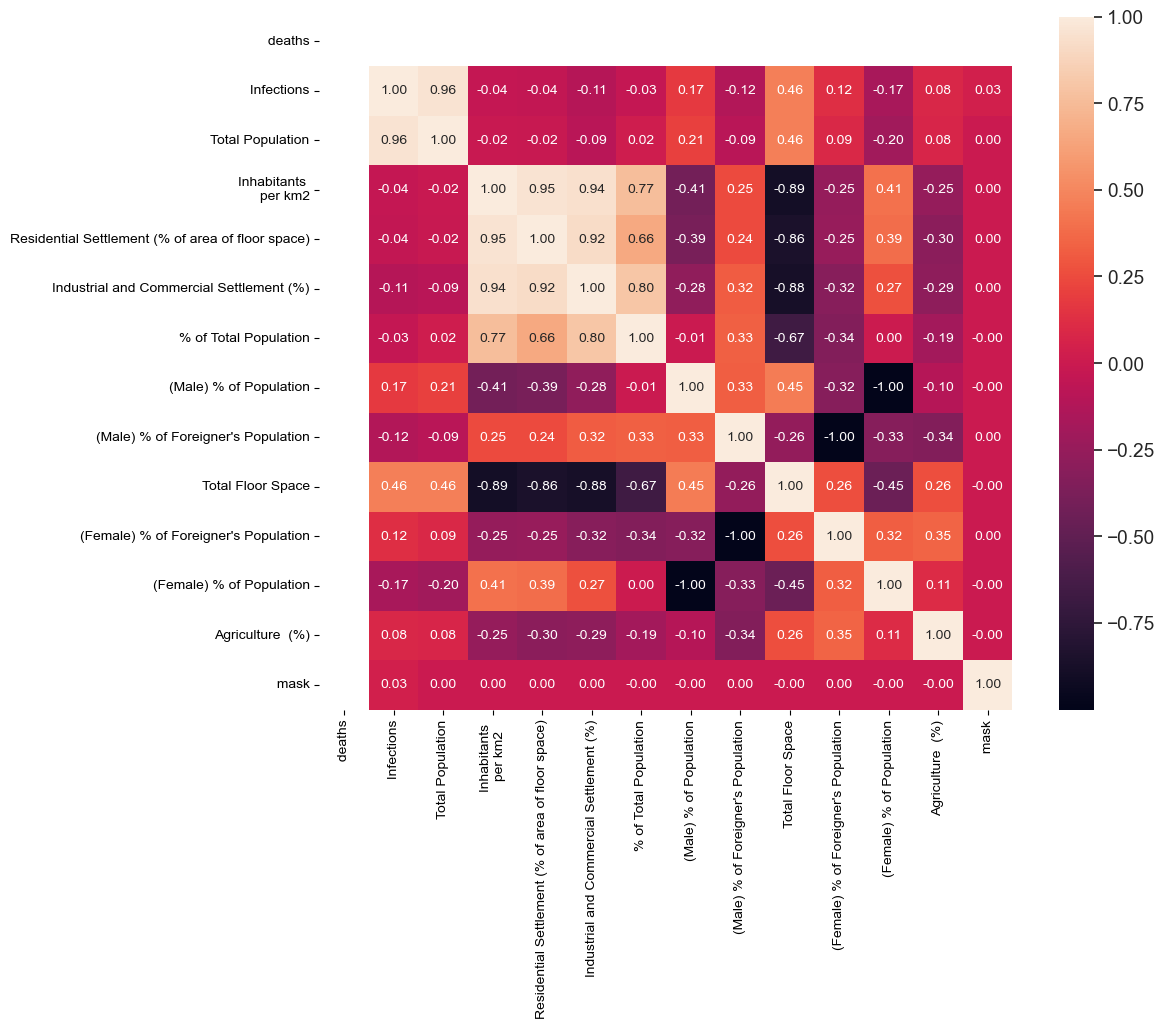

In [20]:
#correlation matrix among all variables
corrmat = combines.corr()
f, ax = plt.subplots(figsize=(12, 9))

k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, ' deaths')[' deaths'].index
cm = np.corrcoef(combines[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

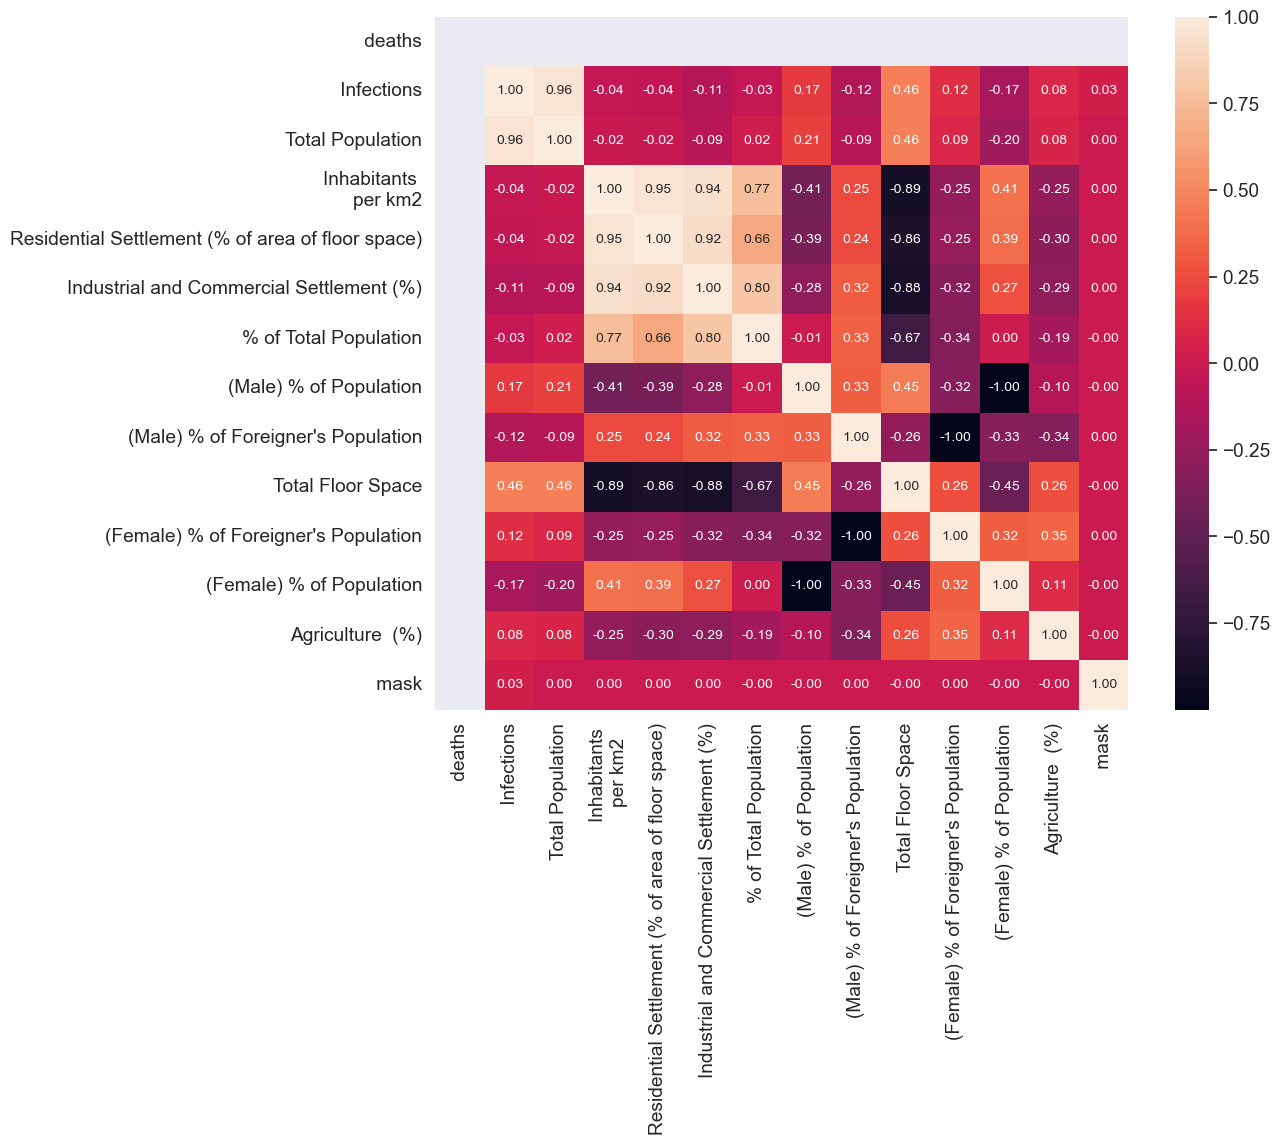

In [21]:
#Pearson co-relation

corrmat = combines.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))

k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, ' deaths')[' deaths'].index
cm = np.corrcoef(combines[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

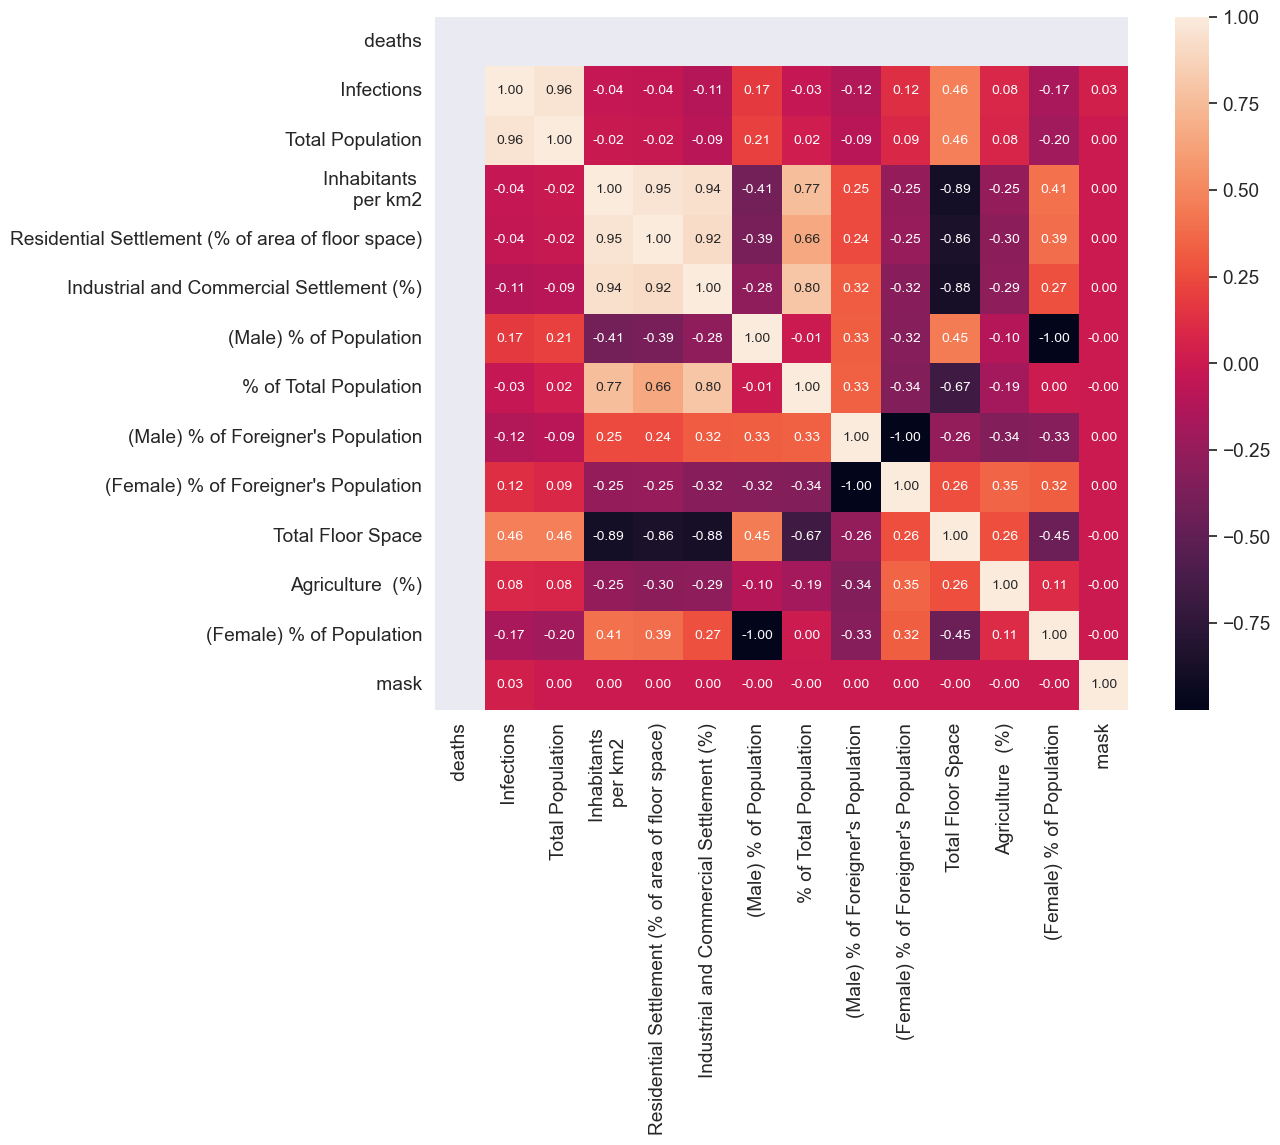

In [22]:
#Spearman co-relation

corrmat = combines.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 9))

k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, ' deaths')[' deaths'].index
cm = np.corrcoef(combines[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

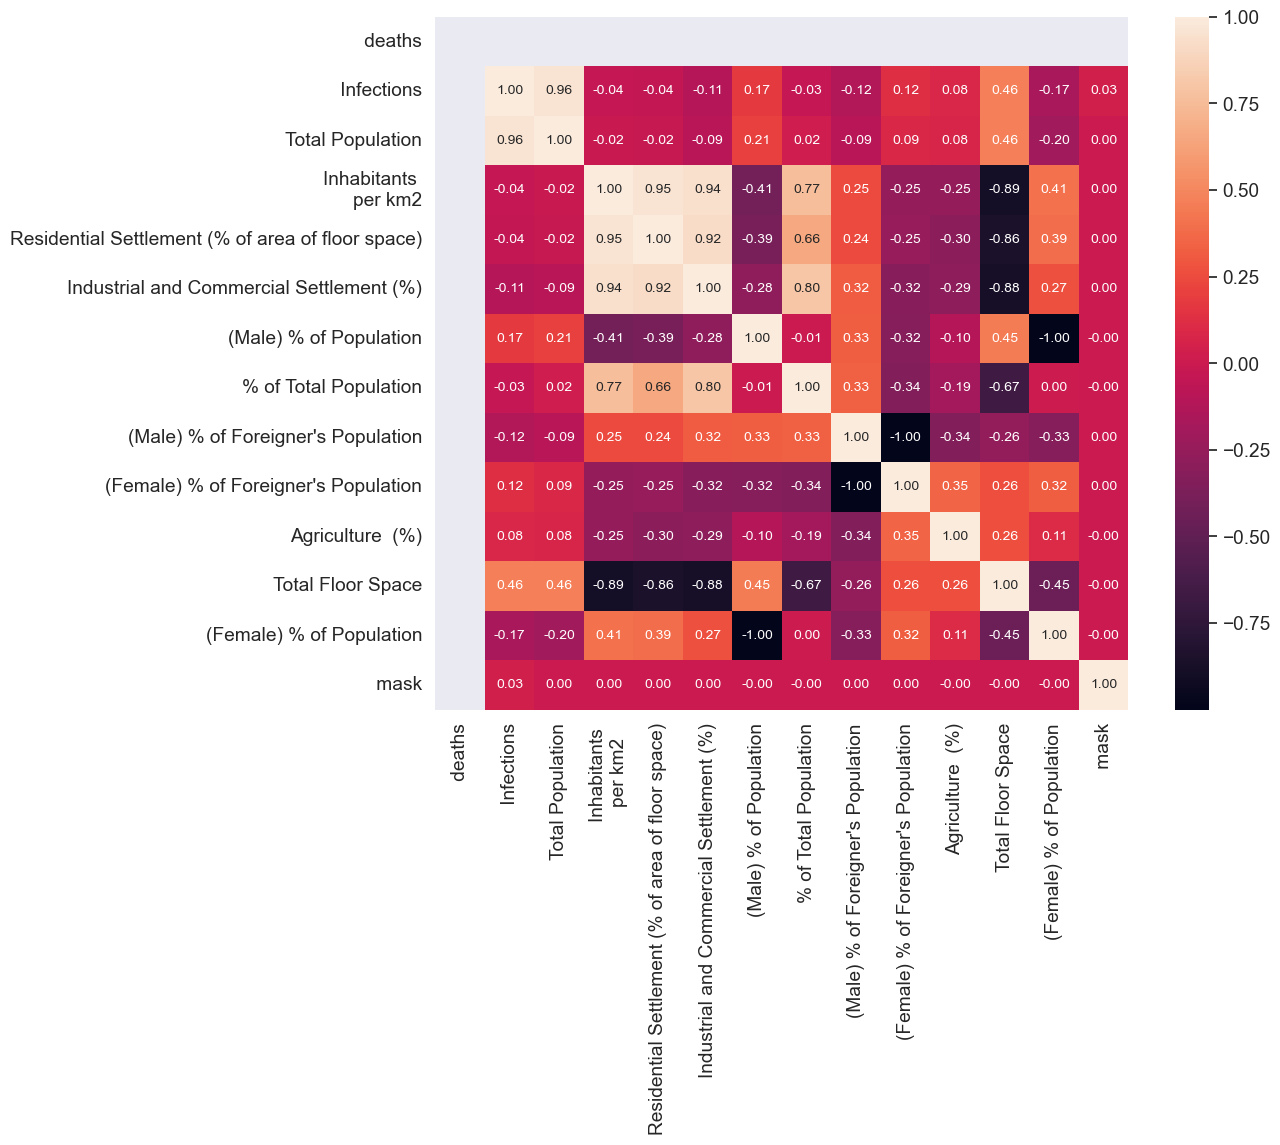

In [23]:
#Method kendall tau

corrmat = combines.corr(method='kendall')
f, ax = plt.subplots(figsize=(12, 9))

k = 14 #number of variables for heatmap
cols = corrmat.nlargest(k, ' deaths')[' deaths'].index
cm = np.corrcoef(combines[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [24]:
y= combines[" mask"]

x = combines.drop([" mask"],axis=1)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state = 42)

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
tf.random.set_seed(0)

# generate the data
X, y = make_classification(n_classes=2, n_features=15, n_informative=4, n_redundant=0, random_state=42)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(15,)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# fit the model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy', 'AUC'])
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), validation_batch_size=64, verbose=0)

# extract the predicted probabilities
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
#print(p_pred.round(2))

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
#print(y_pred)

#print(confusion_matrix(y_test, y_pred))


print(classification_report(y_test, y_pred))

1/1 [==============================] - 0s 168ms/step
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.60      0.55      0.57        11

    accuracy                           0.64        25
   macro avg       0.63      0.63      0.63        25
weighted avg       0.64      0.64      0.64        25



In [27]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.44
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        14
           1       0.36      0.36      0.36        11

    accuracy                           0.44        25
   macro avg       0.43      0.43      0.43        25
weighted avg       0.44      0.44      0.44        25



In [44]:
#fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]

p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
#print(p_pred.round(2))

y_pred = np.where(p_pred > 0.5, 1, 0)
#print(y_pred)

#print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.50      0.64      0.56        11

    accuracy                           0.56        25
   macro avg       0.57      0.57      0.56        25
weighted avg       0.58      0.56      0.56        25



In [28]:
#fit gradient boosted model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]


p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
#print(p_pred.round(2))

y_pred = np.where(p_pred > 0.5, 1, 0)
#print(y_pred)

#print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

#from sklearn.metrics import classification_report
 
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       0.86      0.55      0.67        11

    accuracy                           0.76        25
   macro avg       0.79      0.74      0.74        25
weighted avg       0.78      0.76      0.75        25



In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.70      0.64      0.67        11

    accuracy                           0.72        25
   macro avg       0.72      0.71      0.71        25
weighted avg       0.72      0.72      0.72        25



In [29]:
# Import libraries needed in this example:
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from numpy import sqrt

# Define the BayesianRidge model with default parameters: 
bay_ridge = BayesianRidge()

# Fit the model with trained Bayesian data:
bay_ridge.fit(X_train, y_train)


# Predict the test data and check for accuracy: 
y_predict = bay_ridge.predict(X_test)

p_pred = y_predict.flatten()
#print(p_pred.round(2))

y_pred = np.where(p_pred > 0.5, 1, 0)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.50      0.64      0.56        11

    accuracy                           0.56        25
   macro avg       0.57      0.57      0.56        25
weighted avg       0.58      0.56      0.56        25

